<a href="https://colab.research.google.com/github/NIKIL16S/ML-task-5-6-7/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [290]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

DATA CLEANING

In [291]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [292]:
df.shape

(15, 2)

In [293]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [294]:
df=df.drop_duplicates()
df.shape

(15, 2)

In [295]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [296]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

EDA

<function matplotlib.pyplot.show(*args, **kw)>

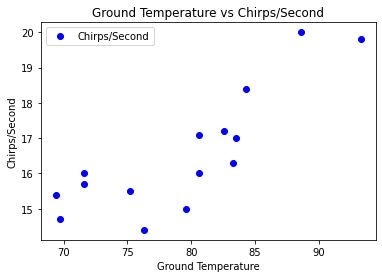

In [297]:
df.plot(x="Ground Temperature",y="Chirps/Second",style='o',color='b')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show

correlation

In [298]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


SPLITTING

In [299]:
X =df.loc[:,['Ground Temperature']].values
y =df.loc[:,'Chirps/Second'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)


MODEL - LINEAR REGRESSION

In [300]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [301]:
print(regression.intercept_) # value of c

2.4650938393241333


In [302]:
print(regression.coef_) # value of m

[0.1763152]


In [303]:
print(regression.predict([[1]]))

[2.64140904]


In [304]:
y_pred = regression.predict(X_test)
y_pred

array([17.02872948, 15.72399698, 17.18741316, 18.08662068])

In [305]:
df = pd.DataFrame({'Actual': y_test, 'Predicated': y_pred})
df

,Actual,Predicated
0,17.2,17.028729
1,15.5,15.723997
2,17.0,17.187413
3,20.0,18.086621


PREDICT FOR 95 TEMP

In [306]:
print('when temperature goes 95 crickets chirp at', regression.predict([[95]]))

when temperature goes 95 crickets chirp at [19.21503797]


EVALUATION METRICS FOR LR - R2-SCORE

In [307]:
from sklearn import metrics
print('r2_score: ',metrics.r2_score(y_test,y_pred))

r2_score:  0.6427109211020445


LR Equation

In [308]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'.format(regression.coef_[0],regression.intercept_))

Linear Regression Equation: y = 0.1763 * x + 2.4651


Determine 18 chirps per second

In [309]:
def temp_chirps(y):
  x = (y - regression.intercept_) / regression.coef_[0]
  print('With an observation of {} chirps/sec,we expect a ground temperature of {:.2f}˚F'.format(y,x))

temp_chirps(18)

With an observation of 18 chirps/sec,we expect a ground temperature of 88.11˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [356]:
df = pd.read_fwf("/brain_body.txt")

In [357]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [358]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


IQR

In [359]:
iqr = df.Brain.quantile(0.75) - df.Brain.quantile(0.25)
upper_threshold = df.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Brain.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)

119.60625


In [360]:
print(lower_threshold)

-70.80375000000001


In [361]:
iqr = df.Body.quantile(0.75) - df.Body.quantile(0.25)
upper_threshold1 = df.Body.quantile(0.75) + (1.5 * iqr)
lower_threshold1 = df.Body.quantile(0.25) - (1.5 * iqr)
print(upper_threshold1)

408.625


In [362]:
print(lower_threshold1)

-238.375


In [363]:
df = df[((df["Brain"]<upper_threshold) & (df["Brain"]>lower_threshold )) & ((df["Body"]<upper_threshold1) & (df["Body"]>lower_threshold1))]

In [364]:
df.describe()

,Brain,Body
count,50.00000,50.000000
mean,9.97438,41.146400
std,21.61098,66.049681
min,0.00500,0.140000
25%,0.31625,3.125000
50%,1.51500,11.750000
75%,4.22375,48.925000
max,100.00000,325.000000


In [365]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [366]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [367]:
df = df.drop_duplicates()
df.shape

(50, 2)

EDA

<function matplotlib.pyplot.show(*args, **kw)>

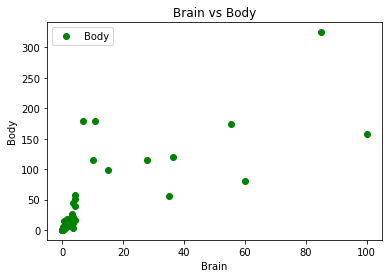

In [368]:
df.plot(x='Brain',y= 'Body',style= 'o',color='g')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show

In [369]:
df.corr() # corr

,Brain,Body
Brain,1.000000,0.770497
Body,0.770497,1.000000


SPLITTING THE DATA

In [370]:
X = df.loc[:,['Brain']].values
y = df.loc[:,'Body'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)

MODEL - LR

In [371]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(X_train,y_train)

LinearRegression()

In [372]:
print(regression_1.intercept_)

17.736813976738155


In [373]:
regression_1.coef_

array([1.72164717])

In [374]:
y_pred = regression_1.predict(X_test)
y_pred

array([ 17.91070034,  22.04093189, 113.28823167,  35.90019157,
       164.07682306,  65.35757458,  18.56320462,  24.709485  ,
        20.06103765,  25.02798972,  18.08114341,  23.41824962,
       121.03564392,  20.66361416,  17.75403045])

In [352]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

,Actual,Prediction
0,6.6,25.802522
1,5.5,25.869807
2,325.0,167.101068
3,6.4,24.835300
4,1.0,24.221324
5,56.0,82.994791
6,3.5,25.440865
7,175.0,117.478365
8,8.1,26.391266
9,1.0,24.322251


In [375]:
print('Linear Regression is y = {:.4f} * x + {:.4f}'.format(regression_1.coef_[0],regression_1.intercept_))

Linear Regression is y = 1.7216 * x + 17.7368


R2_SCORE

In [376]:
from sklearn import metrics 
print('R2_score is :',metrics.r2_score(y_pred,y_test))

R2_score is : -0.8158093710332441


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [382]:
df_sd = pd.read_fwf("/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [377]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [378]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]
    salary = df['Salary']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    print('The equation for columns {} with respect to Salary:\n'
          '{} + {}'.format(salary_discrim_cols, regr_sd.coef_, regr_sd.intercept_))

In [383]:
lin_reg_eq_print(salary_discrim_cols, df_sd)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [384]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]
    focus_output = df[focus]
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    return regr_sd.score(input_cols, focus_output)

In [385]:
print('R^2 score for equation using all columns: {}'
      .format(lin_reg_wrt_focus(salary_discrim_cols, df_sd)))

R^2 score for equation using all columns: 0.8547180674410969


In [386]:
from itertools import combinations

In [387]:
def get_combos(cols):
    return [combinations(cols, n + 1) for n in range(len(cols))]

In [388]:
combos = get_combos(salary_discrim_cols)

In [389]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

In [390]:
combo_scores = all_combo_scores(combos, df_sd)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

In [391]:
num_by_sex = df_sd.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


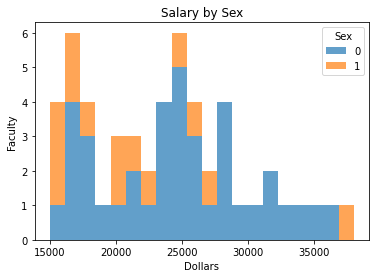

In [392]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

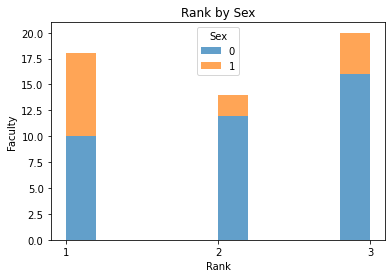

In [393]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

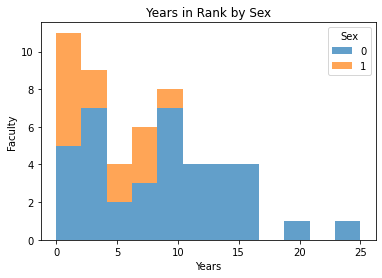

In [394]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

In [395]:
df_sd_10 = df_sd[df_sd['Year'] <= 10]
combos_10 = get_combos(salary_discrim_cols)
combo_10_scores = all_combo_scores(combos_10, df_sd_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660304, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007232, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138202, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080977, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482044, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

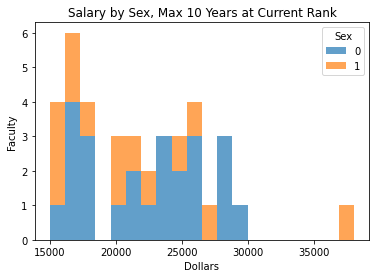

In [396]:
df_sd_10.pivot_table(index=df_sd_10.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

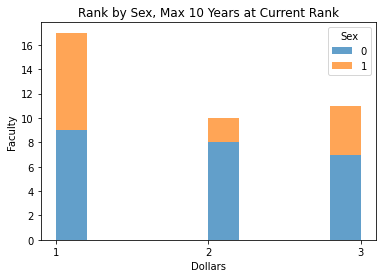

In [397]:
df_sd_10.pivot_table(index=df_sd_10.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

In [398]:
rank_discrim_cols = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_discrim_cols)
combo_rank_scores = all_combo_scores(combos_rank, df_sd_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279376, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037697, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759162, ('Sex', 'YSdeg')),
 (0.4848731472423391, ('Year', 'YSdeg')),
 (0.48257642674080226, ('YSdeg',)),
 (0.17754355818252243, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.1761306214861189, ('Year', 'Degree')),
 (0.17502353196257248, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162727823, ('Degree',))]

There is no salary discrimination by sex